## Classification example using Iris dataset

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df
y = iris.target

In [2]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_estimators=5, class_weight="balanced", oob_score=True, random_state=1)
clf.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [3]:
y_hat = clf.predict(X_test)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print("\n--------Test dataset classification report----------\n")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_hat, target_names=target_names))


--------Test dataset classification report----------

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        19
    class 1       1.00      1.00      1.00        15
    class 2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50



In [5]:
print(np.unique(y_hat))
print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [6]:
from skater.core.explanations import Interpretation
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

interpreter = Interpretation(X_test, feature_names=iris.feature_names)
# Using the interpreter instance invoke call to the TreeSurrogate
t = interpreter.tree_surrogate(estimator_type='classification', feature_names=iris.feature_names, 
                               class_names=iris.target_names, seed=5)

In [7]:
# Using the surrogate model learn the decision boundaries learned by the base estimator
# Also report fidelity value when compared to the base estimator
t.learn(X_test, y_hat, original_y=y_test)

2018-07-15 01:11:52,349 - skater.model.base - WARNING - No examples provided, cannot infer model type


0.0

In [8]:
t.plot_global_decisions(t.estimator, colors=['coral', 'lightsteelblue','darkkhaki'], file_name='simple_tree.png')

2018-07-15 01:11:54,907 - skater.util.dataops - INFO - File Name: simple_tree.png


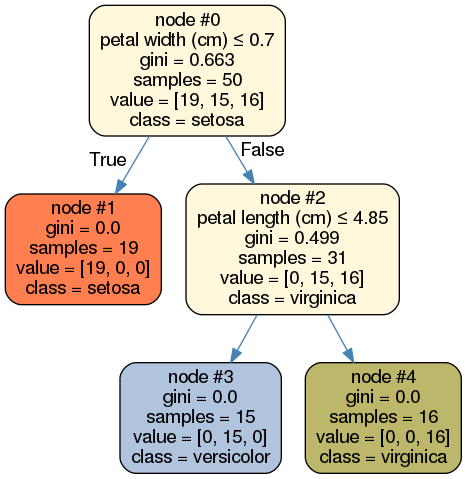

In [9]:
show_in_notebook('simple_tree.png')

## Regression example

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()